In [52]:
from nptdms import TdmsFile
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
from scipy import optimize

In [62]:
file = TdmsFile.read("210402100243_JH167_Pt_8nm_Py_4nm_F6_MR/210402100243_JH167_Pt_8nm_Py_4nm_F6_MR_Result.tdms")
Pt_Py = file['Raw Data'].as_dataframe()
# Field: 900 - 100 mT  (20 steps)
# Current: 8, 7, 6, 5, 4 mA
# angle stepsize: 9 deg
# Wait time: 1s
# AC Gain:  12dB
# Complaince:  5V 
# DAQ_V: 0.3 V at  8mA
# Input FET: FET

file = TdmsFile.read("20211108/20211108_E1_800G_1mA_9deg#3.tdms")
Pt_Co = file["Data"].as_dataframe()
# 2D Magnet
# Field: 800 G
# Current: 1 mA
# Stepsize: 9 deg
# Wait time: 1 s
# Compliance: 5 V

file = TdmsFile.read("20220223/20220223_F2_500G_1mA_12deg#1.tdms")
tungsten = file["Data"].as_dataframe()
# 2D Magnet
# Field: 500 G
# Current: 1 mA
# Stepsize: 12 deg
# Compliance: 5 V

file = TdmsFile.read("20220301/20220301_F2_500G_1mA_12deg#4.tdms")
tungsten2 = file["Data"].as_dataframe()
# 2D Magnet
# Field: 500 G
# Current: 1 mA
# Stepsize: 12 deg
# Compliance: 5 V

file = TdmsFile.read("20220301/20220301_F2_500G_1mA_12deg#5.tdms")
tungsten3 = file["Data"].as_dataframe()
# 2D Magnet
# Field: 500 G
# Current: 1 mA
# Stepsize: 12 deg
# Compliance: 5 V

file = TdmsFile.read("20220301/20220301_F2_500G_1mA_12deg#6.tdms")
tungsten4 = file["Data"].as_dataframe()
# 2D Magnet
# Field: 500 G
# Current: 1 mA
# Stepsize: 12 deg
# Compliance: 5 V

file = TdmsFile.read("20220301/20220301_F2_500G_1mA_12deg#1.tdms")
whisker = file["Data"].as_dataframe()
# 2D Magnet
# Field: 500 G
# Current: 1 mA
# Stepsize: 12 deg
# Compliance: 5 V

file = TdmsFile.read("20220301/20220301_F2_500G_1mA_12deg#2.tdms")
nickel = file["Data"].as_dataframe()
# 2D Magnet
# Field: 500 G
# Current: 1 mA
# Stepsize: 12 deg
# Compliance: 5 V

file = TdmsFile.read("191007111616_JH154_Pt6_Co2.5_MR_D6/191007111616_JH154_Pt6_Co2.5_MR_D6_Result.tdms")
Pt_Co_Jason = file["Raw Data"].as_dataframe()

file = TdmsFile.read("20220304/20220304_G1_500G_1mA_9deg#1.tdms")
G1 = file["Data"].as_dataframe()

file = TdmsFile.read("210512144842_JH282_Pt_6nm_Co_4nm_E6_AMR_Result.tdms")
Pt_Co_AMR = file['Raw Data'].as_dataframe()

print(Pt_Co_AMR)
# Field: 900 - 100 mT  (1 steps)
# Current: 1 mA
# angle stepsize: 9 deg
# Wait time: 1s
# AC Gain: 24 dB
# Complaince:  2V 
# DAQ_V: 0.013 V at  1mA
# Input FET: FET

    I (A)  B (mT)  Angle (deg)   X1w (V)   Y1w (V)   X2w (V)   Y2w (V)  \
0   0.001   900.0       -180.0 -0.098150 -0.000070  0.000003  0.000004   
1   0.001   900.0       -171.0 -0.098140 -0.000070  0.000003  0.000004   
2   0.001   900.0       -162.0 -0.098105 -0.000070  0.000003  0.000004   
3   0.001   900.0       -153.0 -0.098050 -0.000070  0.000003  0.000004   
4   0.001   900.0       -144.0 -0.097980 -0.000070  0.000003  0.000004   
..    ...     ...          ...       ...       ...       ...       ...   
77  0.001   100.0       -144.0 -0.000070 -0.000355 -0.000001  0.000002   
78  0.001   100.0       -153.0 -0.000070 -0.000355 -0.000001  0.000002   
79  0.001   100.0       -162.0 -0.098105 -0.000070  0.000003  0.000004   
80  0.001   100.0       -171.0 -0.098140 -0.000045  0.000002  0.000004   
81  0.001   100.0       -180.0 -0.098155 -0.000070  0.000003  0.000004   

     X1w_DAQ   Y1w_DAQ       X2w_DAQ       Y2w_DAQ   X3w_DAQ   Y3w_DAQ  \
0   0.009144  0.093607  5.193045e-07 

In [42]:
def to_rad(angle):
    return angle * np.pi/ 180

def to_deg(angle):
    return angle * 180 / np.pi

def reduced(df): # returns data frame w/ just the combos of B & I.
    return df[df["Angle (deg)"] == 0][["B (mT)", "I (A)"]]

def angle_series(df, B, I):
    return df[(df["B (mT)"] == B) & (df["I (A)"] == I)]

def harmonic(x, *params): # 1st coeff. UMR + thermal; 2nd coeff. FL-SOT
    return params[0]*np.sin(to_rad(x)) + params[1]*np.sin(2*to_rad(x))*np.cos(to_rad(x))

def cos_sq(x, *params):
    return params[0]*np.cos(to_rad(x) + params[1])*np.cos(to_rad(x) + params[1]) + params[2]

def cos_sq_with_lin(x, *params):
    return params[0]*np.cos(to_rad(x) + params[1])*np.cos(to_rad(x) + params[1]) + params[2]*x + params[3]

def cos_sq_with_sq(x, *params):
    return params[0]*np.cos(to_rad(x) + params[1])*np.cos(to_rad(x) + params[1]) + params[2]*x*x + params[3]*x + params[4]

def lin(x, *params):
    return params[0]*x + params[1]

def get_params(f, x, y, p):
    params, covariance = optimize.curve_fit(f, x, y, p)
    return params

def plot_fit(f, x, y, p, col):
    plt.plot(x, f(x, *p), c=col)
    
p_0 = [0.5]
p_1 = [0.5, 0.05, 0.5]
p_2 = [0.5, 0.05, 0.5, 0.05]
p_3 = [0.5, 0.05, 0.5, 0.05, 0.05]

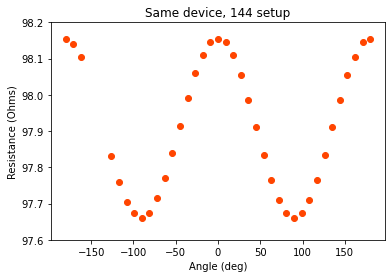

In [124]:
AMR = angle_series(Pt_Co_AMR, 100.0, 0.001)

x = AMR["Angle (deg)"]
y = abs(AMR["X1w (V)"]/0.001)
#y = y-y.mean()
plt.plot(x, y, 'o', label="100mT", c="orangered")
#params = get_params(harmonic, x, y, p_1)
#plot_fit(harmonic, x, y, params, "orangered")

plt.title("Same device, 144 setup")
plt.xlabel("Angle (deg)")
plt.ylabel("Resistance (Ohms)")
#plt.legend()
plt.ylim((97.6, 98.2))
#plt.ylim((-0.0075, -0.0068))
#plt.savefig("Plots/Jason_samesample_AMR", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

[-0.2301061  -0.12592631 84.83349845]


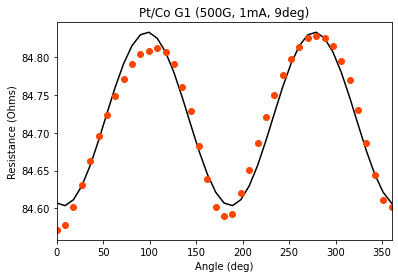

In [108]:
x = G1['X']
y = G1['Y']

y = y/0.001

params = get_params(cos_sq, x, y, p_1)
print(params)
plot_fit(cos_sq, x, y, params, "black")
#plot_fit(cos_sq_with_lin, x, y, params, "black")
#plot_fit(lin, x, y, params, "black")
plt.plot(x, y, 'o', label="500G", c="orangered")
#plt.plot(x2, y2, 'o', c="orangered")

plt.title("Pt/Co G1 (500G, 1mA, 9deg)")
plt.xlabel("Angle (deg)")
plt.ylabel("Resistance (Ohms)")
plt.xlim((0,360))
#plt.legend()
#plt.savefig("Plots/20220304_G1_500G_1mA_9deg#1(cos_sq)", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

[-0.116595   53.08501722]


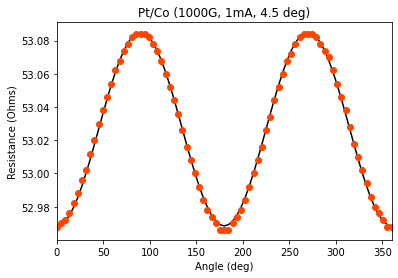

In [8]:
_100mT_1mA = angle_series(Pt_Co_Jason, 100.0, 0.001)
x = _100mT_1mA["Angle (deg)"]+180
y = abs(_100mT_1mA["X1w (V)"])/0.001
params = get_params(cos_sq, x, y, p_0)
print(params)
plot_fit(cos_sq, x, y, params, "black")
plt.plot(x, y, 'o', c="orangered")

plt.title("Pt/Co (1000G, 1mA, 4.5 deg)")
plt.xlabel("Angle (deg)")
plt.ylabel("Resistance (Ohms)")
plt.xlim((0,360))
#plt.savefig("Plots/PtCo_Jason_AMR", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

[ -2.91553181 540.37315935]


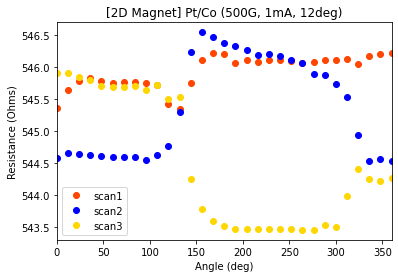

In [62]:
x = tungsten['X']
y = tungsten['Y']
x2 = tungsten2['X']
y2 = tungsten2['Y']
x3 = tungsten3['X']
y3 = tungsten3['Y']
x4 = tungsten4['X']
y4 = tungsten4['Y']

y = y/0.001
y2 = y2/0.001
y3 = y3/0.001
y4 = y4/0.001
#params = get_params(cos_sq, x, y, p_0)
print(params)
#plot_fit(cos_sq, x, y, params, "black")
#plt.plot(x, y, 'o', label="500G", c="orangered")
plt.plot(x2, y2, 'o', label="scan1", c="orangered")
plt.plot(x3, y3, 'o', label="scan2", c="blue")
plt.plot(x4, y4, 'o', label="scan3", c="gold")

plt.title("[2D Magnet] Pt/Co (500G, 1mA, 12deg)")
plt.xlabel("Angle (deg)")
plt.ylabel("Resistance (Ohms)")
plt.xlim((0,360))
plt.legend()
#plt.savefig("Plots/20220301_2F_500G_1mA_12deg_tungstenseries", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

[ -2.91553181 540.37315935]


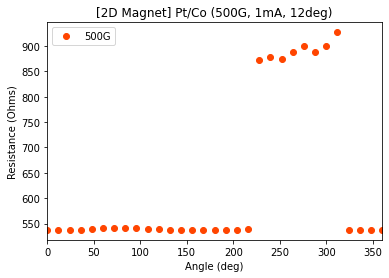

In [60]:
#nickel2 = nickel.iloc[0:-12]
nickel3 = nickel.iloc[-4:] # outliers at end
x = nickel['X']
y = nickel['Y']

x2 = nickel3['X']
y2 = nickel3['Y']
y = y/0.001
#y2 = y2/0.001
#params = get_params(cos_sq, x, y, p_0)
print(params)
#plot_fit(cos_sq, x, y, params, "black")
plt.plot(x, y, 'o', label="500G", c="orangered")
#plt.plot(x2, y2, 'o', c="orangered")

plt.title("[2D Magnet] Pt/Co (500G, 1mA, 12deg)")
plt.xlabel("Angle (deg)")
plt.ylabel("Resistance (Ohms)")
plt.xlim((0,360))
#plt.legend()
#plt.savefig("Plots/20220301_2F_500G_1mA_12deg#2", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

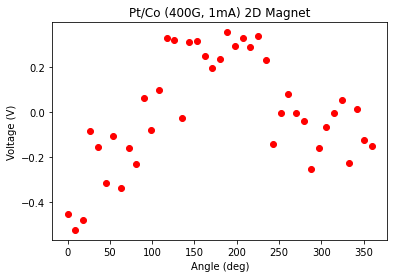

In [72]:
_4f_ = _4f.iloc[0:-4] # outliers at end
x = _4f['X']
y = _4f['Y']
plt.plot(x, y-y.mean(), 'o', label="100mT", c="r")
#params = get_params(cos, x, y-y.mean(), p_1)
#plot_fit(cos, x, y-y.mean(), params, "r")

plt.title("Pt/Co (400G, 1mA) 2D Magnet")
plt.xlabel("Angle (deg)")
plt.ylabel("Voltage (V)")
#plt.savefig("20210524/4F_400G_1mA(noline)", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

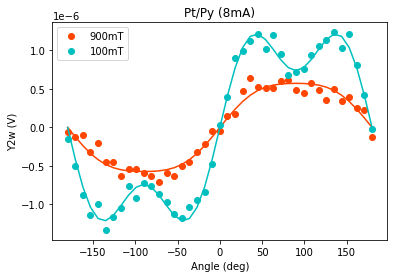

In [6]:
_900mT_8mA = angle_series(Pt_Py, 900.0, 0.008)
_100mT_8mA = angle_series(Pt_Py, 100.0, 0.008)

x = _900mT_8mA["Angle (deg)"]
y = _900mT_8mA["Y2w (V)"]
y = y-y.mean()
plt.plot(x, y-y.mean(), 'o', label="900mT", c="orangered")
params = get_params(harmonic, x, y, p_0)
plot_fit(harmonic, x, y, params, "orangered")

x = _100mT_8mA["Angle (deg)"]
y = _100mT_8mA["Y2w (V)"]
plt.plot(x, y-y.mean(), 'o', label="100mT", c="c")
params = get_params(harmonic, x, y-y.mean(), p_0)
plot_fit(harmonic, x, y-y.mean(), params, "c")

plt.title("Pt/Py (8mA)")
plt.xlabel("Angle (deg)")
plt.ylabel("Y2w (V)")
plt.legend()
#plt.savefig("210402100243_JH167_Pt_8nm_Py_4nm_F6_MR/8mA", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

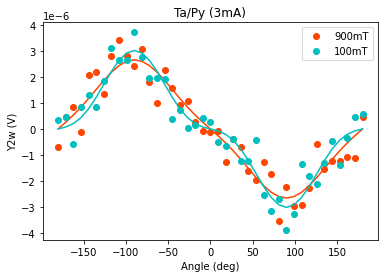

In [7]:
_900mT_8mA = angle_series(Ta_Py, 900.0, 0.003)
_100mT_8mA = angle_series(Ta_Py, 100.0, 0.003)

x = _900mT_8mA["Angle (deg)"]
y = _900mT_8mA["Y2w (V)"]
y = y-y.mean()
plt.plot(x, y-y.mean(), 'o', label="900mT", c="orangered")
params = get_params(harmonic, x, y, p_0)
plot_fit(harmonic, x, y, params, "orangered")

x = _100mT_8mA["Angle (deg)"]
y = _100mT_8mA["Y2w (V)"]
plt.plot(x, y-y.mean(), 'o', label="100mT", c="c")
params = get_params(harmonic, x, y-y.mean(), p_0)
plot_fit(harmonic, x, y-y.mean(), params, "c")

plt.title("Ta/Py (3mA)")
plt.xlabel("Angle (deg)")
plt.ylabel("Y2w (V)")
plt.legend()
#plt.savefig("./210408091951_JH253-Py_Ta_8nm_Py_4nm_E6_AMR/3mA", dpi=200, facecolor='w', edgecolor='w', orientation='portrait')
plt.show()

In [12]:
def get_params_df(df_main, df, f, p_0):
    x = angle_series(df_main, df["B (mT)"], df["I (A)"])["Angle (deg)"]
    y = angle_series(df_main, df["B (mT)"], df["I (A)"])["Y2w (V)"]
    y = y-y.mean()
    return get_params(f, x, y, p_0)
    
    
A_C = Pt_Py.assign(A=lambda df: get_params_df(Pt_Py, df, harmonic, p_0)[0],
                 C=lambda df: get_params_df(Pt_Py, df, harmonic, p_0)[1])
#A_C = data.assign(A=lambda df: df["B (mT)"]*df["I (A)"])
#plt.plot(A_C["B (mT)"], A_C.A, "o")